In [14]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [3]:
hotel= pd.read_csv("hotel_bookings.csv")
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


In [4]:
print(hotel.shape)

(119390, 32)


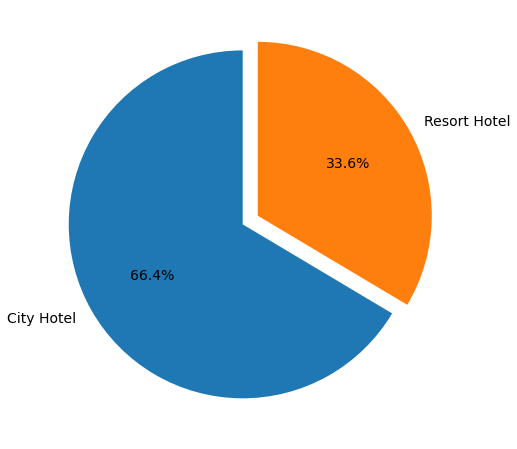

In [6]:
# định nghĩa kích thước biểu đồ
plt.rcParams['figure.figsize'] = 8,8

# Để giá trị ở dạng danh sách dể dễ hình dung
labels = hotel['hotel'].value_counts().index.tolist()

# Chuyển giá trị đếm thành danh sách
sizes = hotel['hotel'].value_counts().tolist()
explode = (0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

In [7]:
#Kiểm tra các cột còn thiếu và xử lý nó (  quá trình Processing đã làm rồi)

hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
hotel=hotel.drop(['agent','company'],axis=1)

In [9]:
hotel = hotel.dropna(axis = 0)

In [10]:
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [11]:
hotel.columns = ['Hotel', 'Canceled', 'LeadTime', 'ArrivingYear', 'ArrivingMonth', 'ArrivingWeek','ArrivingDate', 'WeekendStay',
              'WeekStay', 'Adults', 'Children', 'Babies', 'Meal','Country', 'Segment', 'DistChannel','RepeatGuest', 'PrevCancel',
              'PrevBook', 'BookRoomType','AssignRoomType', 'ChangeBooking', 'DepositType', 'WaitingDays', 
              'CustomerType', 'ADR','ParkSpace', 'SpecialRequest','Reservation', 'ReservationDate']

In [12]:
# Định nghĩa biến phân loại hay biến liên tục
def var(hotel):
    unique_list = pd.DataFrame([[i,len(hotel[i].unique())] for i in hotel.columns])
    unique_list.columns = ['name','uniques']

    total_var = set(hotel.columns)
    cat_var = set(unique_list.name[(unique_list.uniques<=12)      | 
                                   (unique_list.name=='Country')  | 
                                   (unique_list.name=='Agent')                                     
                                  ])
    con_var = total_var - cat_var
    
    return cat_var, con_var 


cat_var, con_var = var(hotel)

print("Continuous Variables (",len(con_var),")\n",con_var,'\n\n'
      "Categorical Variables(",len(cat_var),")\n",cat_var)

Continuous Variables ( 12 )
 {'Adults', 'WeekendStay', 'WeekStay', 'ChangeBooking', 'ADR', 'PrevBook', 'ArrivingDate', 'WaitingDays', 'PrevCancel', 'ArrivingWeek', 'LeadTime', 'ReservationDate'} 

Categorical Variables( 18 )
 {'ArrivingYear', 'Babies', 'Meal', 'DepositType', 'Canceled', 'Hotel', 'ParkSpace', 'ArrivingMonth', 'RepeatGuest', 'CustomerType', 'Reservation', 'AssignRoomType', 'DistChannel', 'Children', 'BookRoomType', 'Segment', 'SpecialRequest', 'Country'}


In [13]:
hotel[con_var].describe()

C:\Users\19521\AppData\Local\Temp\ipykernel_6116\226332744.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  hotel[con_var].describe()


,Adults,WeekendStay,WeekStay,ChangeBooking,ADR,PrevBook,ArrivingDate,WaitingDays,PrevCancel,ArrivingWeek,LeadTime
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,1.858391,0.928897,2.502145,0.221181,102.003243,0.131634,15.800880,2.330754,0.087142,27.166555,104.311435
std,0.578576,0.996216,1.900168,0.652785,50.485862,1.484672,8.780324,17.630452,0.845869,13.589971,106.903309
min,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,1.000000,0.000000,70.000000,0.000000,8.000000,0.000000,0.000000,16.000000,18.000000
50%,2.000000,1.000000,2.000000,0.000000,95.000000,0.000000,16.000000,0.000000,0.000000,28.000000,69.000000
75%,2.000000,2.000000,3.000000,0.000000,126.000000,0.000000,23.000000,0.000000,0.000000,38.000000,161.000000
max,55.000000,16.000000,41.000000,21.000000,5400.000000,72.000000,31.000000,391.000000,26.000000,53.000000,737.000000


In [15]:
hotel.loc[hotel.LeadTime      > 500,'LeadTime'     ]=500
hotel.loc[hotel.WaitingDays   >   0,'WaitingDays'  ]=  1
hotel.loc[hotel.WeekendStay   >=  5,'WeekendStay'  ]=  5
hotel.loc[hotel.Adults        >   4,'Adults'       ]=  4
hotel.loc[hotel.PrevBook      >   0,'PrevBook'     ]=  1
hotel.loc[hotel.PrevCancel    >   0,'PrevCancel'   ]=  1
hotel.loc[hotel.WeekStay      >  10,'WeekStay'     ]= 10
hotel.loc[hotel.ChangeBooking >   5,'ChangeBooking']=  5

cat_var = set(list(cat_var) + ['PrevBook','PrevCancel'])
con_var = set(hotel.columns) - cat_var

hotel[con_var].describe()

,Adults,WeekendStay,WeekStay,ChangeBooking,ADR,ArrivingDate,WaitingDays,ArrivingWeek,LeadTime
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,1.855607,0.924187,2.481581,0.217237,102.003243,15.800880,0.031102,27.166555,104.054543
std,0.488194,0.967762,1.760766,0.602693,50.485862,8.780324,0.173595,13.589971,105.834923
min,0.000000,0.000000,0.000000,0.000000,-6.380000,1.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,1.000000,0.000000,70.000000,8.000000,0.000000,16.000000,18.000000
50%,2.000000,1.000000,2.000000,0.000000,95.000000,16.000000,0.000000,28.000000,69.000000
75%,2.000000,2.000000,3.000000,0.000000,126.000000,23.000000,0.000000,38.000000,161.000000
max,4.000000,5.000000,10.000000,5.000000,5400.000000,31.000000,1.000000,53.000000,500.000000


In [16]:

hotel[cat_var].describe()

,PrevBook,Canceled,ParkSpace,Children,SpecialRequest,ArrivingYear,RepeatGuest,Babies,PrevCancel
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.028571,0.371352,0.061885,0.104207,0.571683,2016.157656,0.032011,0.007948,0.054223
std,0.166597,0.483168,0.244172,0.399172,0.792678,0.707459,0.176029,0.097380,0.226458
min,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,2017.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,8.000000,10.000000,5.000000,2017.000000,1.000000,10.000000,1.000000


In [17]:
#Covert data type
hotel['ArrivingYear'] = hotel['ArrivingYear'].astype('str')
hotel['ArrivingMonth'] = hotel['ArrivingMonth'].astype('str')
hotel['ArrivingDate'] = hotel['ArrivingDate'].astype('str')

hotel['Canceled'] = hotel['Canceled'].astype('str')
hotel['RepeatGuest'] = hotel['RepeatGuest'].astype('str')
hotel['Arrival Date'] = hotel['ArrivingDate'] + '-' + hotel['ArrivingMonth'] + '-' + hotel['ArrivingYear']
hotel['Arrival Date'] = pd.to_datetime(hotel['Arrival Date'], errors='coerce')

In [18]:
confirmed_bookings = hotel[hotel.Canceled=='0']

In [19]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Hotel            118898 non-null  object        
 1   Canceled         118898 non-null  object        
 2   LeadTime         118898 non-null  int64         
 3   ArrivingYear     118898 non-null  object        
 4   ArrivingMonth    118898 non-null  object        
 5   ArrivingWeek     118898 non-null  int64         
 6   ArrivingDate     118898 non-null  object        
 7   WeekendStay      118898 non-null  int64         
 8   WeekStay         118898 non-null  int64         
 9   Adults           118898 non-null  int64         
 10  Children         118898 non-null  float64       
 11  Babies           118898 non-null  int64         
 12  Meal             118898 non-null  object        
 13  Country          118898 non-null  object        
 14  Segment          118

In [20]:
import datetime as dt
confirmed_bookings['ArrivingMonth'] = hotel['Arrival Date'].dt.month
final=confirmed_bookings['ArrivingMonth'].value_counts().sort_index()
final

1     4068
2     5317
3     6591
4     6533
5     7102
6     6393
7     7892
8     8618
9     6367
10    6867
11    4632
12    4365
Name: ArrivingMonth, dtype: int64

In [21]:
#Thống kê canceled
print('canceled')
print('*******************')
print(hotel.Canceled.value_counts())
print('Cancelation percentage in both hotels ')
print('*******************')
print(hotel.Canceled.value_counts(normalize=True))

canceled
*******************
0    74745
1    44153
Name: Canceled, dtype: int64
Cancelation percentage in both hotels 
*******************
0    0.628648
1    0.371352
Name: Canceled, dtype: float64


In [22]:
## Country
hotel.Country.value_counts(normalize=True)

PRT    0.408636
GBR    0.102012
FRA    0.087596
ESP    0.072062
DEU    0.061288
         ...   
DJI    0.000008
BWA    0.000008
HND    0.000008
VGB    0.000008
NAM    0.000008
Name: Country, Length: 177, dtype: float64

Text(0.5, 1.0, 'Arriving year, Leadtime and Cancelations')

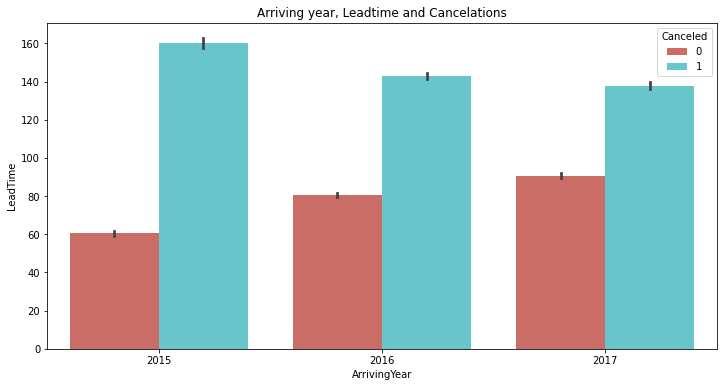

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x='ArrivingYear', y='LeadTime',hue='Canceled', data= hotel, palette='hls')
plt.title('Arriving year, Leadtime and Cancelations')

<AxesSubplot:>

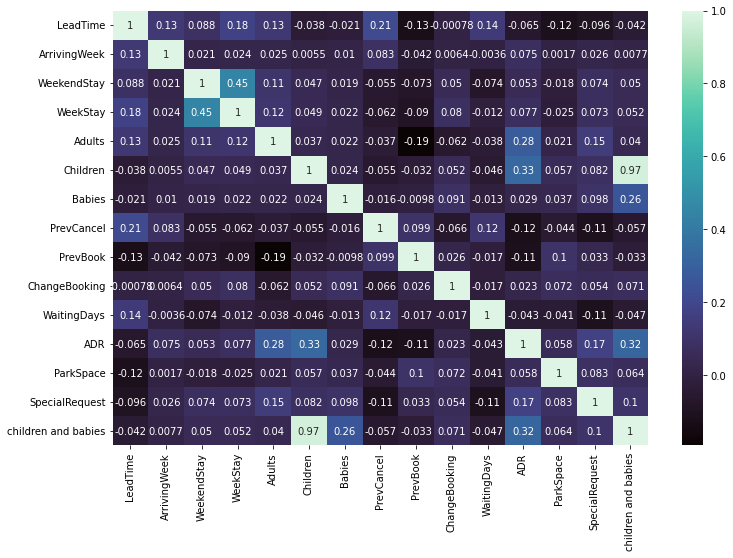

In [56]:
#Lets see the correlation
plt.figure(figsize=(12,8))
sns.heatmap(hotel.corr(),annot=True,cmap='mako')

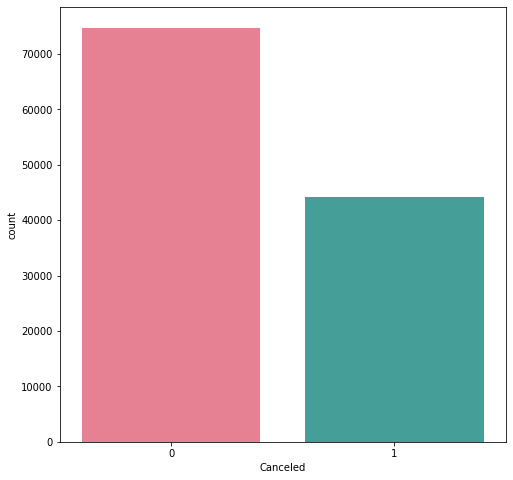

In [57]:
#Canceled=1, Not canceled= 0
canceled_data = hotel['Canceled']
sns.countplot(canceled_data, palette='husl')

plt.show()

<AxesSubplot:ylabel='Canceled'>

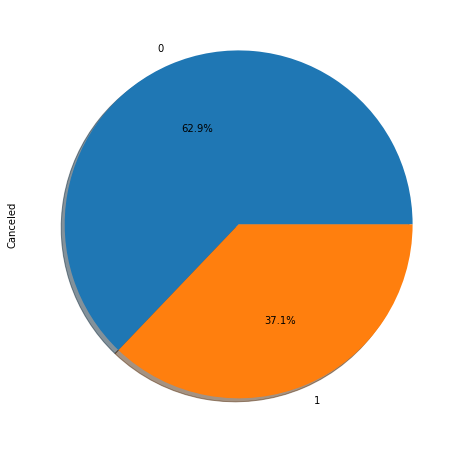

In [58]:
hotel['Canceled'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

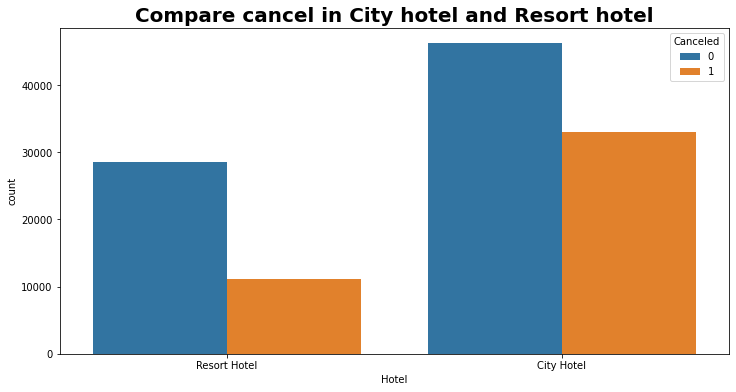

In [59]:
plt.figure(figsize=(12, 6))

sns.countplot(x='Hotel',hue="Canceled", data=hotel)
plt.title("Compare cancel in City hotel and Resort hotel",fontweight="bold", size=20)
plt.show()

Text(0.5, 1.0, 'Arrivals per year ')

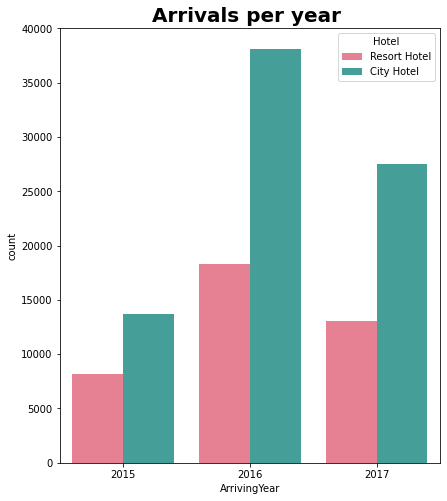

In [60]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='ArrivingYear',hue='Hotel', data=hotel,palette='husl')
plt.title("Arrivals per year ",fontweight="bold", size=20)

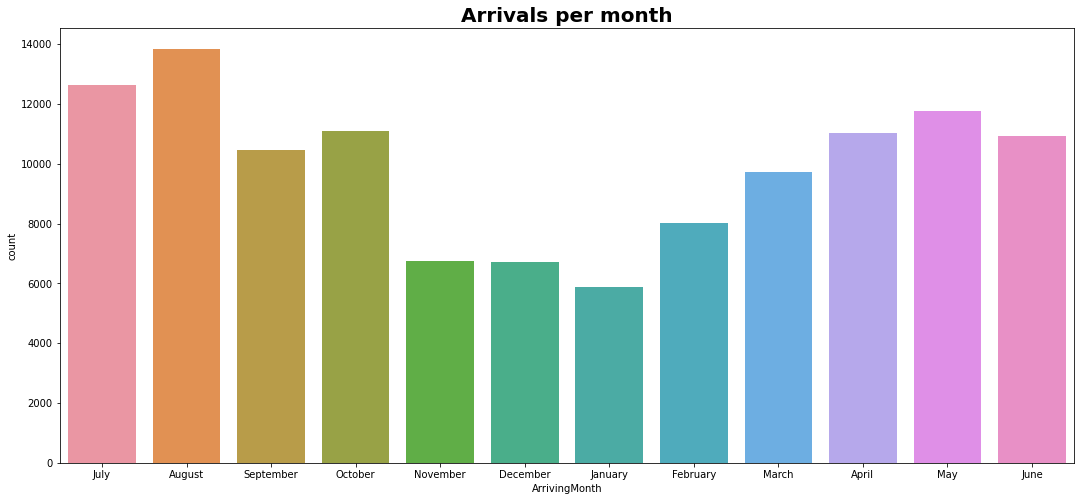

In [66]:
plt.subplot(1,2,2)
sns.countplot(data = hotel, x = 'ArrivingMonth')
plt.title('Arrivals per month',fontweight="bold", size=20)
plt.subplots_adjust(right=4)
plt.show()

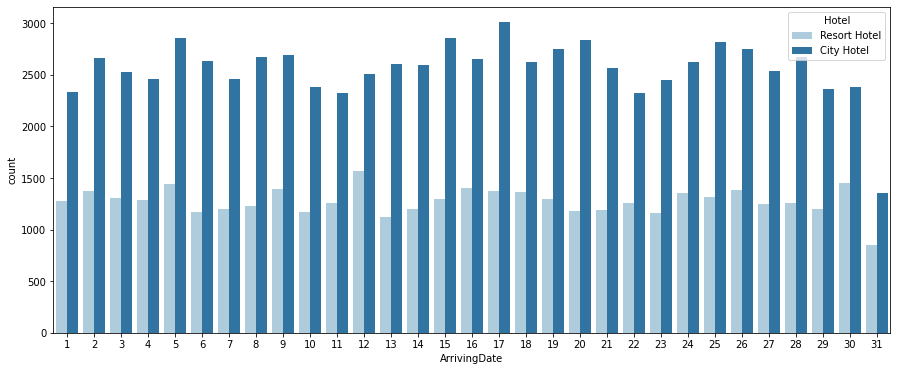

In [67]:
plt.figure(figsize=(15,6))
sns.countplot(data = hotel, x = 'ArrivingDate', hue='Hotel', palette='Paired')
plt.show()

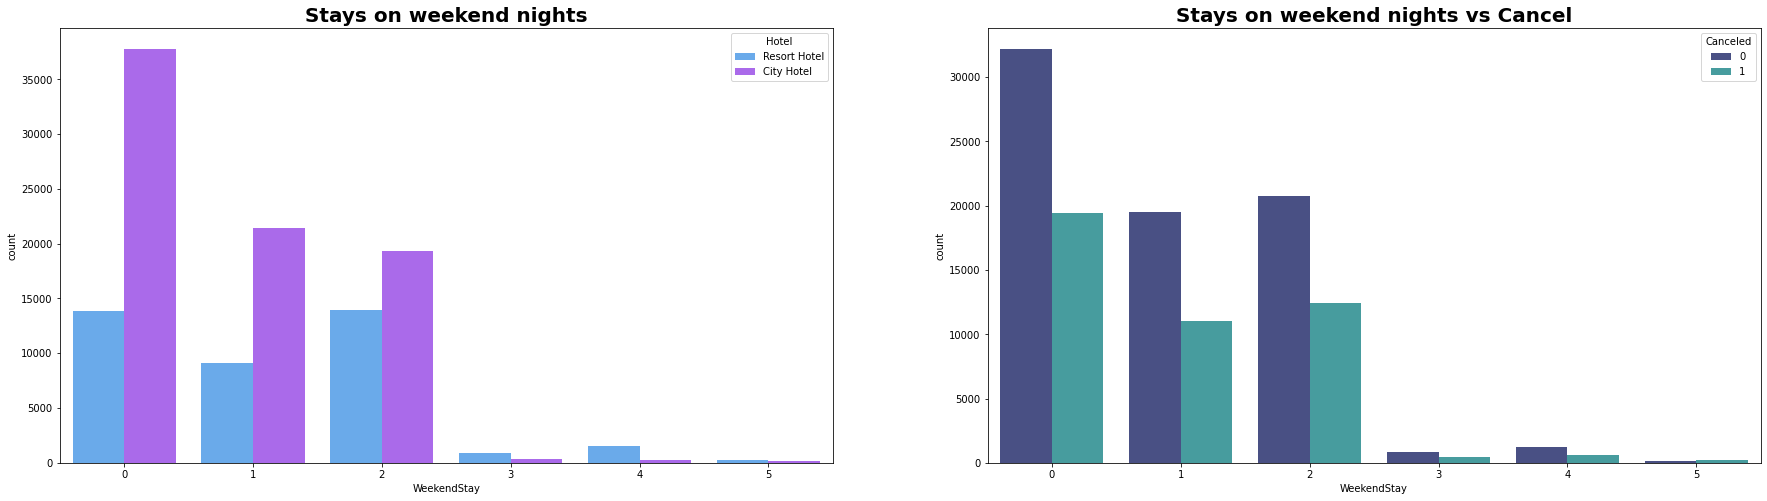

In [69]:
### Weekend Stay
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='WeekendStay',hue='Hotel', data=hotel, palette='cool')
plt.title("Stays on weekend nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'WeekendStay', hue='Canceled', palette='mako')
plt.title('Stays on weekend nights vs Cancel',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)
plt.show()

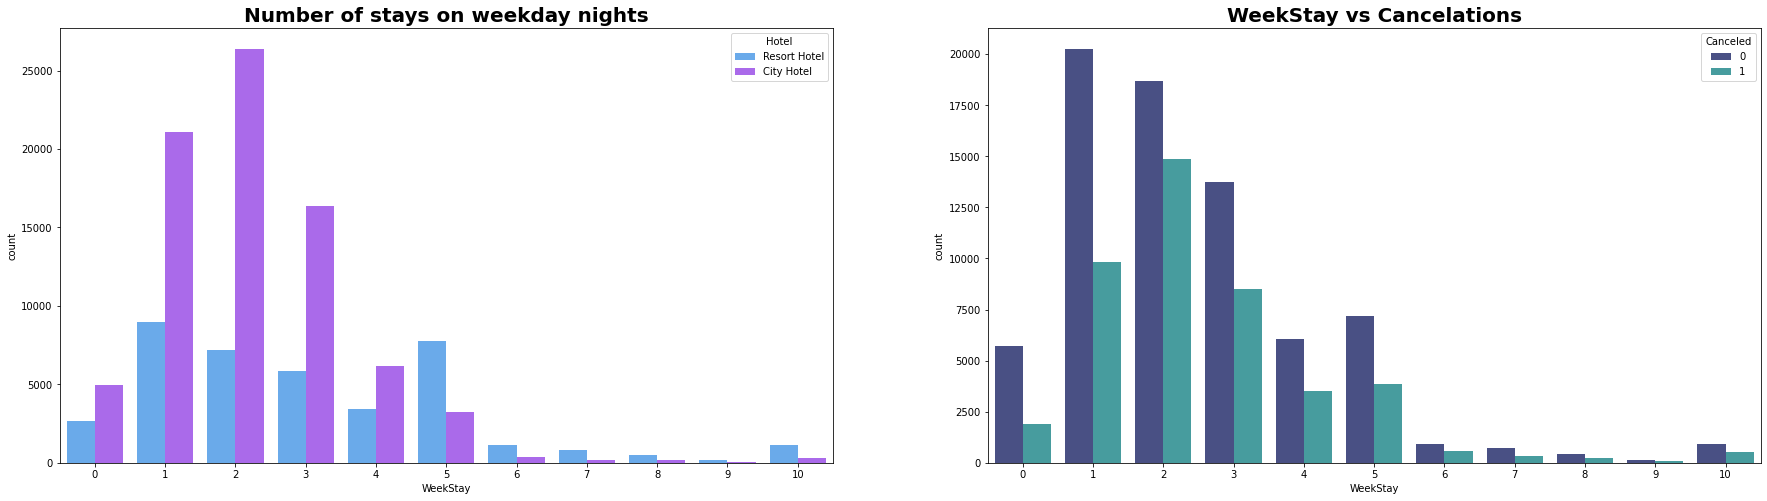

In [70]:
#Week Stay
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='WeekStay',hue='Hotel', data=hotel, palette='cool')
plt.title("Number of stays on weekday nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'WeekStay', hue='Canceled', palette='mako')
plt.title('WeekStay vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)
plt.show()

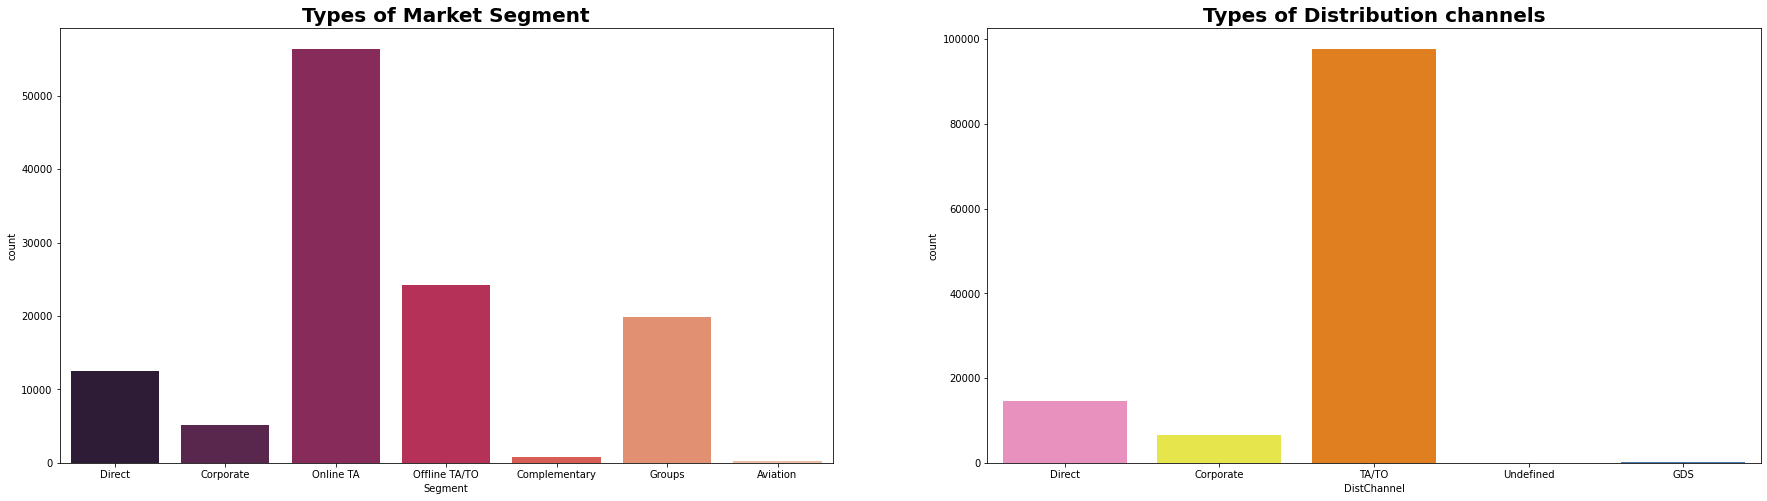

In [72]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='Segment', data=hotel, palette='rocket')
plt.title('Types of Market Segment',fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'DistChannel',  palette='Set1_r')
plt.title('Types of Distribution channels',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)
plt.show()

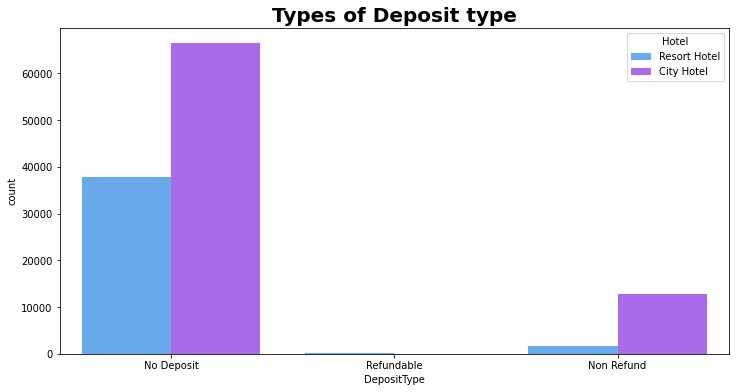

In [73]:
plt.figure(figsize=(12, 6))

sns.countplot(data = hotel, x = 'DepositType',hue='Hotel', palette='cool')
plt.title('Types of Deposit type',fontweight="bold", size=20)


plt.show()

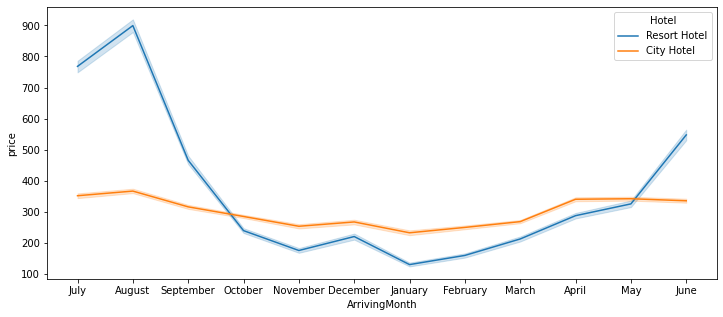

In [74]:
plt.figure(figsize=(12,5))
# Calculating average daily rate per person
hotel['adr_pp'] = hotel['ADR'] / (hotel['Adults'] + hotel['Children']) 
actual_guests = hotel.loc[hotel["Canceled"] == '0']
actual_guests['price'] = actual_guests['ADR'] * (actual_guests['WeekendStay'] + actual_guests['WeekStay'])
sns.lineplot(data = actual_guests, x = 'ArrivingMonth', y = 'price', hue = 'Hotel')
plt.show()

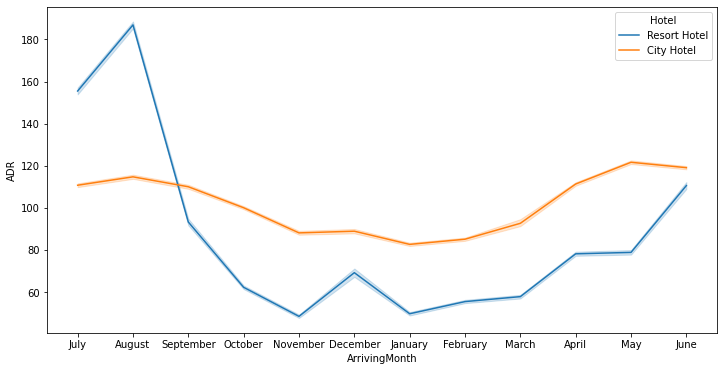

In [75]:
plt.figure(figsize=(12,6))
sns.lineplot(x='ArrivingMonth', y='ADR', hue='Hotel', data= hotel)
plt.show()

In [27]:
import plotly.express as px

In [30]:
country_visitor = hotel[hotel['Canceled'] == '0'].groupby(['Country']).size().reset_index(name = 'count')
px.choropleth(country_visitors,
                    locations = "Country",
                    color= "count" ,
                    hover_name= "Country",
                    color_continuous_scale="Viridis",
                    title="Country of visitors travel")

#nhiều dư khách đến từ tây âu, pháp, Anh,. BDN,..